<center><font face="Times New ROman" size="10" color="#000080">- NA03 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [1]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
#-----------------------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#-----------------------------------------------------#
name = 'na-03'

In [2]:
#------------------------------------------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('NA03D.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))
#----------------------------------------As propriedades petrofisicas do poco--------------------------------------------#


prof = np.array(data[:,0],float) # profundidade em metros
DTP  = np.array(data[:,1],float) # DTp em us/ft
GR   = np.array(data[:,2],float) # GR em unidades API
ILD  = np.array(data[:,3],float) # ILD em Ohm.m
PHIN = np.array(data[:,4],float) # PHIN em %
RHOb = np.array(data[:,5],float) # RHOb em g/cm3

print
print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0])
print prof[162], prof[876], prof[1007]

7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna

(2950.0556000000001, -999.0, 94.514200000000002, 1.5669, 28.1311, 2.4239000000000002)
2974.7444 3083.558 3103.5224


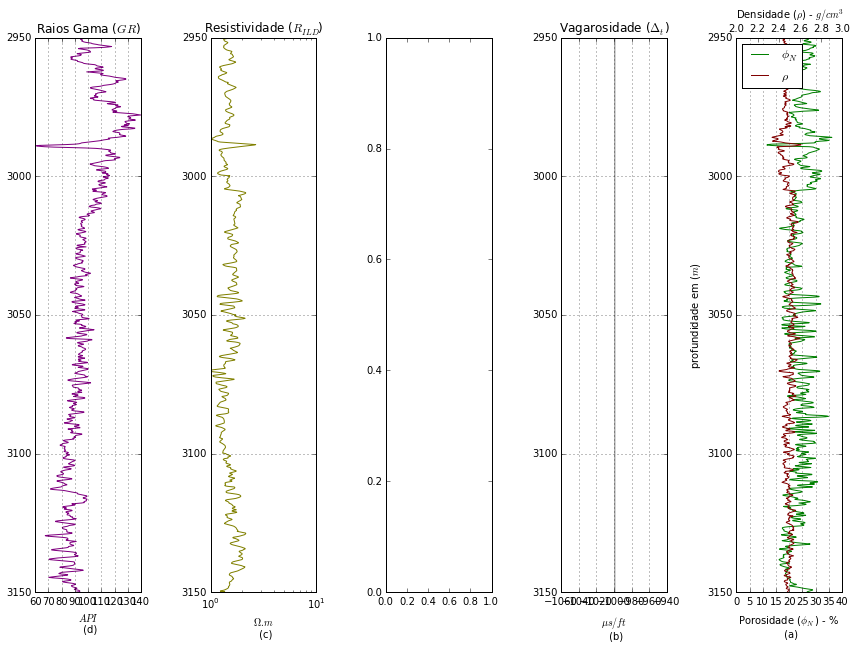

In [3]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$')
ax1.set_title(u'Raios Gama ($GR$)')

ax1.set_xlabel('$API$ \n (d)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (c)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')
ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (b)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (a)')                    
ax5.set_ylabel('profundidade em ($m$)')
ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
labf = lab5+lab0
labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=2)
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0)
ax5.set_xlim(xmax=40.0,xmin=0.0)
ax5.invert_yaxis()
ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Argilosidade -</font>

In [4]:
#-----------------------------------------------------Raio Gamma---------------------------------------------------------#
IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

256 posicao do GR min | 60.9277 valor do GR min
183 posicao do GR min | 139.7852 valor do GR max

0.450335879461  media (IGR) - indice de raio gama
0.208154921  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidade -</font>

In [5]:
#--------------------------------------------------Porosidade Total------------------------------------------------------#
RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada

RHOma  = 2.65 # g/cm3 para o quartzo
DTPma = 55.5 # us/feet para o quartzo

print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'
#------------------------------------------------------------------------------------------------#
PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'
#------------------------------------------------------------------------------------------------#
PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'
print '------------------------------------'
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva densidade'

2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama
55.5 dtma da matriz | 189.0 DTPf do filtrado de lama

10.3217366977  media (PHItd) - porosidade total pelo perfil densidade em %

13.2631417486  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
708  ponto de folhelho (Psh)

2.5542 densidade do folhelho (RHOsh)
------------------------------------
9.0343744361  media (PHIe) -  porosidade efetiva densidade


<br><center><font face="Times New ROman" size="6" color="#000000">- Litologia -</font>

In [6]:
M  = np.array([[185.0,55.50,96.00,48.100,85.0],
               [1.10,2.650,2.540,2.710,2.56],
               [0.0,1.00,171.00,12.00,59.0],
               [100.0,-0.018,-0.006,0.002,0.24],
               [1,1,1,1,1]],float)

#print M

V = []
for i in range (p):
    r = np.array([DTP[i],RHOb[i],GR[i],PHIN[i],1],float)

    v = np.dot(np.linalg.inv(M),r)
    
    v2 = [0.0]*len(v)
    v3 = [0.0]*len(v)
    for j in range (len(v)):
        v2[j] = v[j]+(min(v)*(-1))
    #print v2
    
    for j in range (len(v)):
        v3[j] = v2[j]/sum(v2)
    
    V.append(v)
    #print v,sum(v)
    

VM = np.array(V)

print VM[:,0]

#------------------------------------------------------------------------------------------------------------------------#

flu = []
qtz = []
fld = []
cao = []
sha = []
for i in range (p):
    flu.append(VM[i,0] - min(VM[:,0]))
    qtz.append(VM[i,1] - min(VM[:,1]))
    fld.append(VM[i,2] - min(VM[:,2]))
    cao.append(VM[i,3] - min(VM[:,3]))
    sha.append(VM[i,4] - min(VM[:,4]))
  
    
flu_c = [0.0]*p
qtz_c = [0.0]*p
fld_c = [0.0]*p
cao_c = [0.0]*p
sha_c = [0.0]*p

for i in range (p):
    flu_c[i] = flu[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    qtz_c[i] = qtz[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    fld_c[i] = fld[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    cao_c[i] = cao[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])
    sha_c[i] = sha[i]/(flu[i]+qtz[i]+fld[i]+cao[i]+sha[i])

calcio  = []
arenito = []
for i in range (p):
    arenito.append(qtz_c[i] + fld_c[i])
    calcio.append(sha_c[i] + cao_c[i] - VSH[i])
    
#------------------------------------------------------------------------------------------------------------------------#

arem2 = [0]*p #are - Areia media
silt2 = [0]*p #sil - silte
shal2 = [0]*p #arg - Argila

calu2 = [0]*p # mar - Calcilutito
marl2 = [0]*p # mao - Marga

for i in range (p):
    if arenito[i] > VSH[i] and arenito[i] > calcio[i] and VSH[i] > calcio[i]:
        silt2[i] = 80
    #---------------------------------------------#
    if arenito[i] > VSH[i] and arenito[i] > calcio[i] and VSH[i] < calcio[i]:
        arem2[i] = 90
    #---------------------------------------------#
    if arenito[i] > VSH[i] and arenito[i] < calcio[i] and VSH[i] < calcio[i]:
        calu2[i] = 60
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] > calcio[i] and VSH[i] > calcio[i]:
        silt2[i] = 70
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] < calcio[i] and VSH[i] > calcio[i]:
        shal2[i] = 70
    #---------------------------------------------#
    if arenito[i] < VSH[i] and arenito[i] < calcio[i] and VSH[i] < calcio[i]:
        marl2[i] = 70

[ 0.63428287  0.62800723  0.61818885 ...,  0.62103646  0.61806278
  0.61785121]


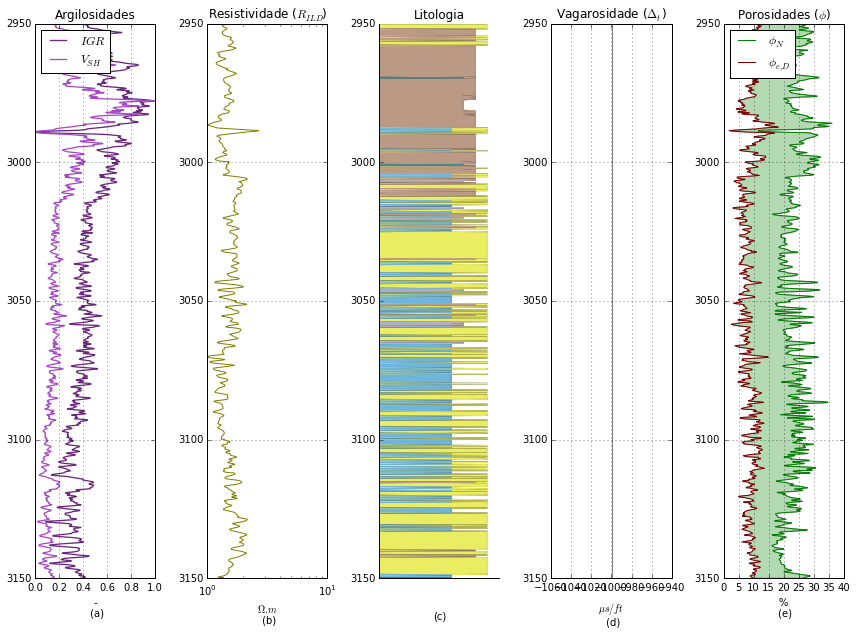

In [7]:
#--------------------------------------------------------Graficos--------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)

#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades')

ax1.set_xlabel('- \n (a)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis()
ax1.grid()

ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)')

ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.invert_yaxis()
ax2.grid()

#ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(arem2,prof,'-',linewidth = 1,color='#eaec61')
ax3.plot(silt2,prof,'-',linewidth = 1,color='#bb9a85')
ax3.plot(shal2,prof,'-',linewidth = 1,color='#438d8e')
ax3.plot(calu2,prof,'-',linewidth = 1,color='#6fb5db')
ax3.plot(marl2,prof,'-',linewidth = 1,color='#bdaebe')

ax3.fill_betweenx(prof, arem2, facecolor='#eaec61')
ax3.fill_betweenx(prof, silt2, facecolor='#bb9a85')
ax3.fill_betweenx(prof, shal2, facecolor='#438d8e')
ax3.fill_betweenx(prof, calu2, facecolor='#6fb5db')
ax3.fill_betweenx(prof, marl2, facecolor='#bdaebe')

ax3.set_title('Litologia')                       
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=100,xmin=0.0)

ax3.invert_yaxis()

ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.spines['bottom'].set_visible(False)

ax3.yaxis.set_ticks_position('left')
ax3.axes.get_xaxis().set_ticks([])

ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$')


ax4.set_title('Vagarosidade ($\Delta _t$)')                      
ax4.set_xlabel('$\mu s / ft$ \n (d)')
ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.invert_yaxis()
ax4.grid()

#ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIe  ,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e,D}$')

ax5.set_title('Porosidades ($\phi$)')                      
ax5.set_xlabel('% \n (e)')
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis()
ax5.grid()

ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIN>PHIe, facecolor='Green' , alpha=0.3)
ax5.fill_betweenx(prof, PHIN, PHIe, where=PHIe>PHIN, facecolor='Black' , alpha=0.7)

ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Perfil Sônico Sintético -</font>

In [8]:
#------------------------------------------------------Siqueira----------------------------------------------------------#
PHIs = max(PHIsh) #Usar essa porosidade aqui para estimar

DTPs = []

for i in range (p):
    
    DTPs.append(DTPma + (DTPf - DTPma)*((PHItd[i]/100.0) + (VSH[i]*(PHIs/100.0)))) # Sonico (Siqueira & Martins)
#---------------------------------------------------------------------------------------------------
ms   = mean(DTPs)
mdtp = mean(DTP)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VPs=[] # velocidade de onda P (Siqueira e Martins)
for i in range(p):
    VPs.append(1.0000/(cfvp*DTPs[i]))

print ms

75.7699444081


In [9]:
VPa = [] # Vp de augusto

cfvp0 = 3.2808*(10**(-6)) # fator de conversao 

for i in range (p): # determinando VPa em ms
    VPa.append(0.1088*(RHOb[i]**4))
        
DTPa = []
for i in range(p):
    VPa[i] = VPa[i]*1000.000
    DTPa.append(1.0000/(cfvp0*VPa[i]))

#---------------------------------------------------------------------------------------------------

ma   = mean(DTPa)
mdtp = mean(DTP)

print ma
print mean(VPa)

73.0868021678
4190.64344379


$VP(\rho_b) = 0.1088\times \rho_b^4$ - Gardner

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Impedância Acústica -</font>

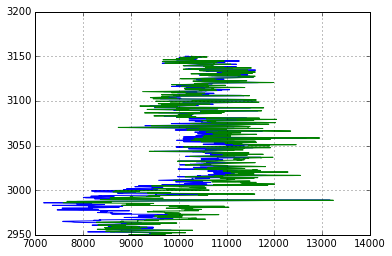

In [10]:
#--------------------------------------Impedancia---(transformado de pe pra m)-------------------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

#------------------------------------------------------Impedancia Acustica-----------------------------------------------#
z_imp_a = [] # Impedancia acustica Augusto  (m/s).(g/cm3)
z_imp_s = [] # Impedancia acustica Siqueira (m/s).(g/cm3)

Za = [] # Impedancia acustica Augusto (Km/s).(g/cm3)
Zs = [] # Impedancia acustica Siqueira(Km/s).(g/cm3)

for i in range (p):    
    z_imp0a = (RHOsi[i]*VPa[i]) # de olho no RHOsi e RHOb
    z_imp_a.append(z_imp0a)
    Za.append(z_imp0a*1000.000)
    
    z_imp0s = (RHOsi[i]*VPs[i]) # de olho no RHOsi e RHOb
    z_imp_s.append(z_imp0s)
    Zs.append(z_imp0s*1000.000)
    
#------------------------------------------------------------------------------------------------------------------------#
plt.plot(Zs,prof,'-b',linewidth = 1)
plt.plot(Za,prof,'-g',linewidth = 1)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Refletividade -</font>

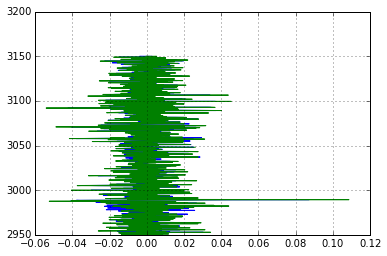

In [11]:
#-----------------------------------------------------Refletividades-----------------------------------------------------#
Rs = [] # Refletividade Siqueira
Ra = [] # Refletividade Augusto

for i in range (p):
    if i == 0:
        RRs= 0
        RRa= 0
    if i != 0:
        RRs= (z_imp_s[i-1] - z_imp_s[i])/(z_imp_s[i-1] + z_imp_s[i])
        RRa= (z_imp_a[i-1] - z_imp_a[i])/(z_imp_a[i-1] + z_imp_a[i])
    Rs.append(RRs)
    Ra.append(RRa)
    
zero_bar = [0]*p

#------------------------------------------------------------------------------------------------------------------------#
plt.plot(Rs,prof,'-b',linewidth = 1)
plt.plot(Ra,prof,'-g',linewidth = 1)
plt.grid()
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Tempo -</font>

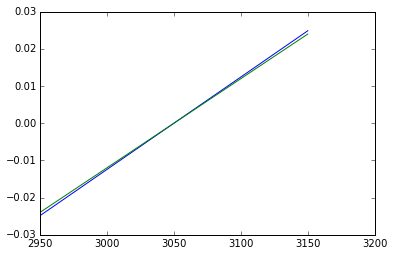

In [12]:
#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

Ts = [] #tempo por intervalo Siqueira
Ta = [] #tempo por intervalo Augusto 

for i in range (p):
    Ts.append(DL/VPs[i])
    Ta.append(DL/VPa[i])
    
#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = (p-1)/2 # termo central

dtfs = [0.0]*mp
dtbs = [0.0]*mp

dtfa = [0.0]*mp
dtba = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    
    dtfs[i] = np.mean(Ts)
    dtbs[i] = -(np.mean(Ts))
    
    dtfa[i] = np.mean(Ta)
    dtba[i] = -(np.mean(Ta))
    
for i in range (1,mp):
    dtfs[i] = dtfs[i-1] + dtfs[i]
    dtfa[i] = dtfa[i-1] + dtfa[i]
    
for i in range (1,mp):
    dtbs[i] = dtbs[i-1] + dtbs[i]
    dtba[i] = dtba[i-1] + dtba[i]
    
dtbs.reverse()
dtba.reverse()

TTs = [0.0]*p
TTa = [0.0]*p

for i in range (len(dtbs)):
    TTs[i] = dtbs[i]
    TTa[i] = dtba[i]

for i in range (mp+1,p):
    TTs[i] = dtfs[i-mp-1]
    TTa[i] = dtfa[i-mp-1]
    
plt.plot(prof,TTs,'-b')
plt.plot(prof,TTa,'-g')
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Wavlet e Convolução -</font>

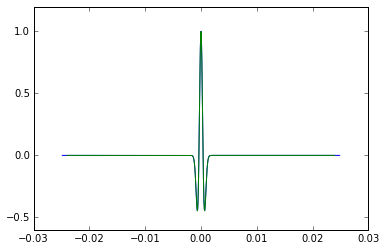

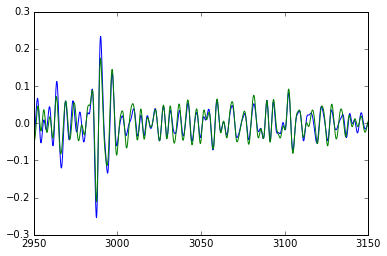

In [13]:
#wavlet

A = 1.000000
f = 600 
ff = str(f) + " - Hz"
    
wavs = []
for i in range (len(TTs)):
    EE1s = -(np.pi**2)*(f**2)*(TTs[i]**2)
    wav01s = A*(1 - (2*(np.pi**2)) * (f**2) * (TTs[i]**2))*np.exp(EE1s) # 2497.55919007
    wavs.append(wav01s)
    
wava = []
for i in range (len(TTs)):
    EE1a = -(np.pi**2)*(f**2)*(TTa[i]**2)
    wav01a = A*(1 - (2*(np.pi**2)) * (f**2) * (TTa[i]**2))*np.exp(EE1a) # 2497.55919007
    wava.append(wav01a)
    
plt.plot(TTs,wavs,'-b')
plt.plot(TTa,wava,'-g')
plt.show()

# Convolucao

signals = np.convolve(Rs,wavs,'same') # wavlet convolucao Siqueira
signala = np.convolve(Ra,wava,'same') # wavlet convolucao Augusto

plt.plot(prof,signals,'-b')
plt.plot(prof,signala,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

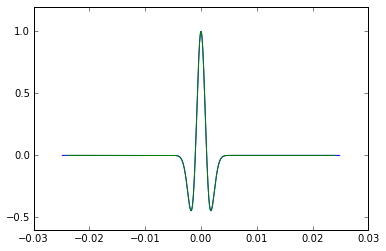

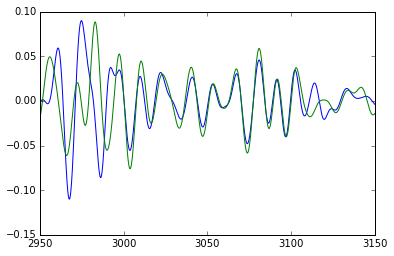

In [14]:
#wavlet

A1 = 1.000000
f1 = 220
ff1 = str(f1) + " - Hz"
    
wav1s = []
for i in range (len(TTs)):
    EE2s = -(np.pi**2)*(f1**2)*(TTs[i]**2)
    wav02s = A1*(1 - (2*(np.pi**2)) * (f1**2) * (TTs[i]**2))*np.exp(EE2s) # 2497.55919007
    wav1s.append(wav02s)
    
wav1a = []
for i in range (len(TTs)):
    EE2a = -(np.pi**2)*(f1**2)*(TTa[i]**2)
    wav02a = A1*(1 - (2*(np.pi**2)) * (f1**2) * (TTa[i]**2))*np.exp(EE2a) # 2497.55919007
    wav1a.append(wav02a)
    
plt.plot(TTs,wav1s,'-b')
plt.plot(TTa,wav1a,'-g')
plt.show()

# Convolucao

signal1s = np.convolve(Rs,wav1s,'same') # wavlet convolucao Siqueira
signal1a = np.convolve(Ra,wav1a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal1s,'-b')
plt.plot(prof,signal1a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

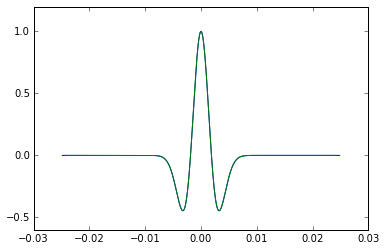

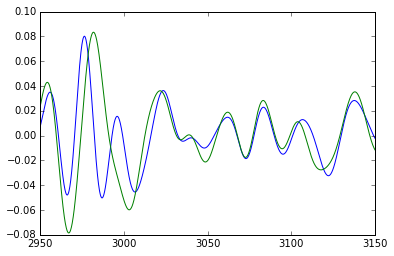

In [15]:
#wavlet

A2 = 1.000000
f2 = 120
ff2 = str(f2) + " - Hz"
    
wav2s = []
for i in range (len(TTs)):
    EE3s = -(np.pi**2)*(f2**2)*(TTs[i]**2)
    wav03s = A2*(1 - (2*(np.pi**2)) * (f2**2) * (TTs[i]**2))*np.exp(EE3s) # 2497.55919007
    wav2s.append(wav03s)
    
wav2a = []
for i in range (len(TTs)):
    EE3a = -(np.pi**2)*(f2**2)*(TTa[i]**2)
    wav03a = A2*(1 - (2*(np.pi**2)) * (f2**2) * (TTa[i]**2))*np.exp(EE3a) # 2497.55919007
    wav2a.append(wav03a)

plt.plot(TTs,wav2s,'-b')
plt.plot(TTa,wav2a,'-g')
plt.show()

# Convolucao

signal2s = np.convolve(Rs,wav2s,'same') # wavlet convolucao Siqueira
signal2a = np.convolve(Ra,wav2a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal2s,'-b')
plt.plot(prof,signal2a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

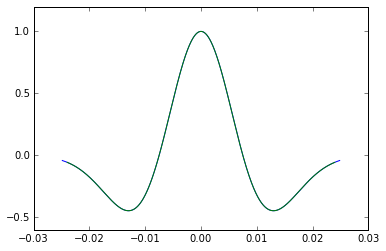

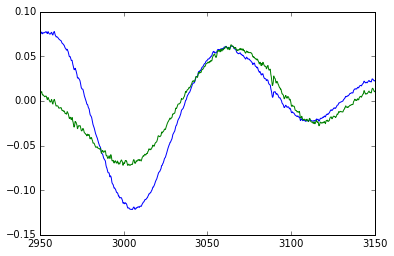

In [16]:
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string
    
wav3s = []
for i in range (len(TTs)):
    EE4s = -(np.pi**2)*(f3**2)*(TTs[i]**2)
    wav04s = A3*(1 - (2*(np.pi**2)) * (f3**2) * (TTs[i]**2))*np.exp(EE4s) # 2497.55919007
    wav3s.append(wav04s)
    
wav3a = []
for i in range (len(TTs)):
    EE4a = -(np.pi**2)*(f3**2)*(TTa[i]**2)
    wav04a = A3*(1 - (2*(np.pi**2)) * (f3**2) * (TTa[i]**2))*np.exp(EE4a) # 2497.55919007
    wav3a.append(wav04a)

plt.plot(TTs,wav3s,'-b')
plt.plot(TTa,wav3a,'-g')
plt.show()

# Convolucao

signal3s = np.convolve(Rs,wav3s,'same') # wavlet convolucao Siqueira
signal3a = np.convolve(Ra,wav3a,'same') # wavlet convolucao Augusto

plt.plot(prof,signal3s,'-b')
plt.plot(prof,signal3a,'-g')
plt.xlim(xmax=prof[p-1])
plt.show()

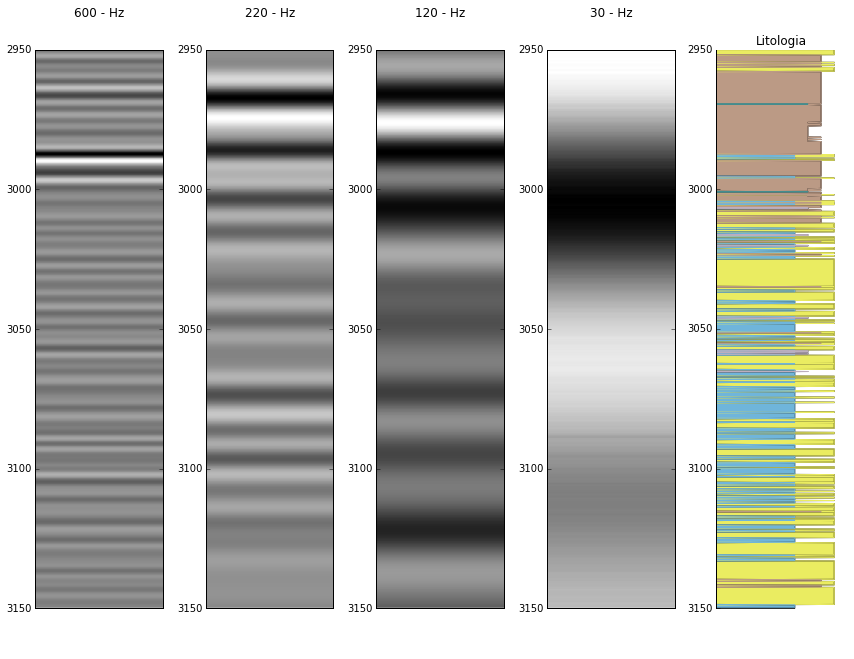

In [17]:
vals = 300

DD = [signals]*vals
DD = np.array(DD)
DD = np.transpose(DD)

DD1 = [signal1s]*vals
DD1 = np.array(DD1)
DD1 = np.transpose(DD1)

DD2 = [signal2s]*vals
DD2 = np.array(DD2)
DD2 = np.transpose(DD2)

DD3 = [signal3s]*vals
DD3 = np.array(DD3)
DD3 = np.transpose(DD3)

sism_sint0 = np.linspace(0,p,5)
sism_sint1 = [2950,3000,3050,3100,3150]
#------------------------------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
fig.suptitle('', fontsize=20)
fig.set_size_inches(12, 10)
#------------------------------------------------------------------------------------------------------------------------#
ax1.matshow(DD,cmap=cm.gray)
ax1.set_title(ff)
ax1.axes.get_xaxis().set_visible(False)
ax1.set_yticks(sism_sint0)
ax1.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax2.matshow(DD1,cmap=cm.gray)
ax2.set_title(ff1)
ax2.axes.get_xaxis().set_visible(False)
ax2.set_yticks(sism_sint0)
ax2.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax3.matshow(DD2,cmap=cm.gray)
ax3.set_title(ff2)
ax3.axes.get_xaxis().set_visible(False)
ax3.set_yticks(sism_sint0)
ax3.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax4.matshow(DD3,cmap=cm.gray)
ax4.set_title(ff3)
ax4.axes.get_xaxis().set_visible(False)
ax4.set_yticks(sism_sint0)
ax4.set_yticklabels(sism_sint1)
#--------------------------------------------------------------------------------------------------#
ax5.plot(arem2,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(silt2,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(shal2,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(calu2,prof,'-',linewidth = 1,color='#6fb5db')
ax5.plot(marl2,prof,'-',linewidth = 1,color='#bdaebe')

ax5.fill_betweenx(prof, arem2, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt2, facecolor='#bb9a85')
ax5.fill_betweenx(prof, shal2, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu2, facecolor='#6fb5db')
ax5.fill_betweenx(prof, marl2, facecolor='#bdaebe')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0.0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['bottom'].set_visible(False)
ax5.set_xlabel('$\,$')
ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

ax5.xaxis.set_label_coords(0.5, -0.06)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Resultados -</font>

In [18]:
#---------------------------------Medidas-Estatisticas------------------------------------#

#----------------------------------------------#
medVPa = np.mean(VPa) # media
maxVPa = max    (VPa) # maximo
minVPa = min    (VPa) # minimo
varVPa = np.var (VPa) # variancia
stdVPa = np.std (VPa) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPa------------"
print medVPa,"m/s   - media "
print maxVPa,"m/s   - valor maximo"
print minVPa,"m/s   - valor minimo"
print varVPa,"m²/s² - variancia"
print stdVPa,"m/s   - desvio padrao"
print "-------------------------------------"
#----------------------------------------------#
medVPs = np.mean(VPs) # media
maxVPs = max    (VPs) # maximo
minVPs = min    (VPs) # minimo
varVPs = np.var (VPs) # variancia
stdVPs = np.std (VPs) # desvio padrao
#----------------------------------------------#
print "-----------valores de VPs------------"
print medVPs,"m/s   - media "
print maxVPs,"m/s   - valor maximo"
print minVPs,"m/s   - valor minimo"
print varVPs,"m²/s² - variancia"
print stdVPs,"m/s   - desvio padrao"
print "-------------------------------------"

-----------valores de VPa------------
4190.64344379 m/s   - media 
5065.87647472 m/s   - valor maximo
3245.36647046 m/s   - valor minimo
81520.0021182 m²/s² - variancia
285.517078505 m/s   - desvio padrao
-------------------------------------
-----------valores de VPs------------
4053.71449924 m/s   - media 
5051.30672327 m/s   - valor maximo
3008.90384058 m/s   - valor minimo
115157.378828 m²/s² - variancia
339.348462245 m/s   - desvio padrao
-------------------------------------


In [19]:
#-----------------------------------------Porosidade Sonica-------------------------------------------

PHIts = []
PHIes = []
gas   = []

DTPsh = DTPs[Psh]
for i in range (p):
    
    PHIts.append(((DTPs[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTPs[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh - DTPma)/(DTPf - DTPma))))*100.00)

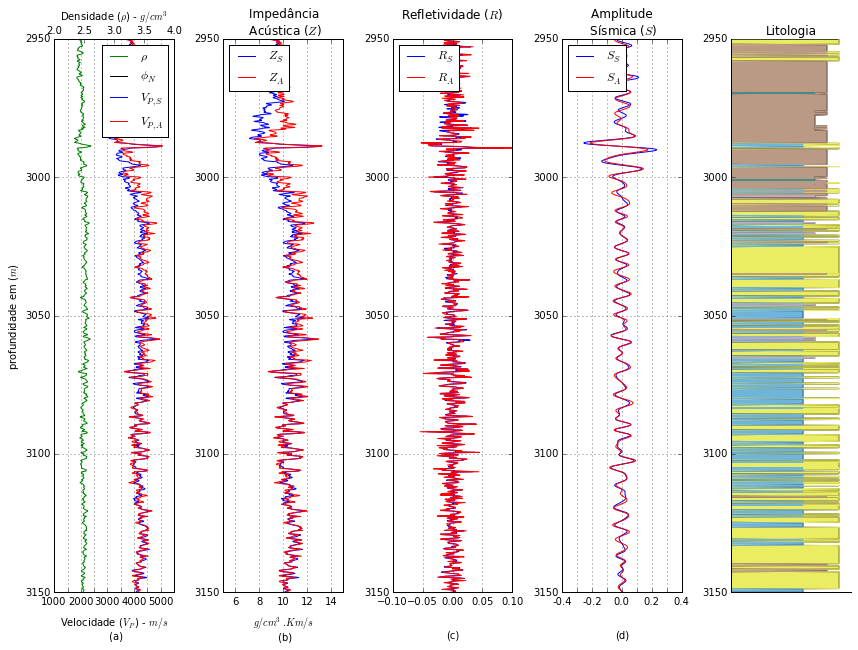

In [22]:
#--------------------------------------------------------------------------------------------------#
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

#fig.suptitle('', fontsize=12)
fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1 = ax1.plot(PHIN,prof,'-k',linewidth = 1,label='$\phi_N$')
lab2 = ax1.plot(VPs,prof,'-b',linewidth = 1,label='$V_{P,S}$')
lab3 = ax1.plot(VPa,prof,'-r',linewidth = 1,label='$V_{P,A}$')

ax1.set_ylabel('profundidade em ($m$)')

ax0 = ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)')

labf = lab0+lab1+lab2+lab3

labs = [l.get_label() for l in labf]
plt.legend(labf, labs, loc=0)

ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2)

ax1.invert_yaxis()
ax1.grid()

ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#
ax2.plot(z_imp_s,prof,'-b',linewidth = 1,label='$Z_{S}$')
ax2.plot(z_imp_a,prof,'-r',linewidth = 1,label='$Z_{A}$')         

ax2.set_title(u'Impedância \n Acústica ($Z$)')                      
ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof))
ax2.set_xlim(xmax=15,xmin=5)
ax2.invert_yaxis()
ax2.grid()

ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(Rs,prof,'-b',linewidth = 1,label='$R_{S}$') 
ax3.plot(Ra,prof,'-r',linewidth = 1,label='$R_{A}$') 
ax3.set_title('Refletividade ($R$) \n')
ax3.set_xlabel('(c)')
ax3.xaxis.set_label_coords(0.5, -0.07)

#ax3.set_xlabel('$m/s$')
ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1)
ax3.invert_yaxis()
ax3.grid()

ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------# 
ax4.plot(signals,prof,'-b',linewidth = 1,label='$S_S$')
ax4.plot(signala,prof,'-r',linewidth = 1,label='$S_A$')

ax4.set_title(u'Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)')
ax4.xaxis.set_label_coords(0.5, -0.07)

ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4)
ax4.invert_yaxis()
ax4.grid()

ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])

ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax5.plot(arem2,prof,'-',linewidth = 1,color='#eaec61')
ax5.plot(silt2,prof,'-',linewidth = 1,color='#bb9a85')
ax5.plot(shal2,prof,'-',linewidth = 1,color='#438d8e')
ax5.plot(calu2,prof,'-',linewidth = 1,color='#6fb5db')
ax5.plot(marl2,prof,'-',linewidth = 1,color='#bdaebe')

ax5.fill_betweenx(prof, arem2, facecolor='#eaec61')
ax5.fill_betweenx(prof, silt2, facecolor='#bb9a85')
ax5.fill_betweenx(prof, shal2, facecolor='#438d8e')
ax5.fill_betweenx(prof, calu2, facecolor='#6fb5db')
ax5.fill_betweenx(prof, marl2, facecolor='#bdaebe')

ax5.set_title('Litologia')                       
ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.set_xlim(xmax=100,xmin=0.0)

ax5.invert_yaxis()

ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

ax5.yaxis.set_ticks_position('left')
ax5.axes.get_xaxis().set_ticks([])

ax5.xaxis.set_label_coords(0.5, -0.06)
#-------------------#

plt.tight_layout()
# Make space for title
plt.subplots_adjust(top=0.85)
plt.show()

name2 = '../../mario_tese/Figs/pocos/na'+name+'perfil2.png'
transparent=True
fig.savefig(name2, dpi=100, transparent=True, bbox_inches='tight')

<br><center><font face="Times New ROman" size="6" color="#000000">- Banco de Dados - Exportando Valores -</font>

In [21]:
X = [355226]*p
Y = [7518072]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTPs   # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp_s  # Impedancia acustica
filef[:,9] = Rs      # Refletividade
filef[:,10] = signals # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp_a  # Impedancia acustica
filef[:,12]= Ra      # Refletividade
filef[:,13]= signala # Sismograma sintetico

np.savetxt('na03_mario.dat', filef, delimiter=' ', fmt='%.4f')